In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
submission_data = pd.read_csv("processed_data.csv")
submission_data.head()

,brand,che_pc_usd,che_perc_gdp,cluster_nl,corporation,country,launch_date,date,drug_id,ind_launch_date,...,population,prev_perc,price_month,price_unit,public_perc_che,therapeutic_area,target,date_month,date_year,indication_count
0,BRAND_354E,1.209114,1.665879,BRAND_354E_COUNTRY_88A3,CORP_D524,COUNTRY_88A3,2014-06-01,2014-06-01,DRUG_ID_8795,NaN,...,1.008039,0.028367,1.006444,1.013784,1.835821,THER_AREA_980E,1.000784,6,2014,1
1,BRAND_626D,1.472378,1.753338,BRAND_626D_COUNTRY_8B47,CORP_01C7,COUNTRY_8B47,2014-06-01,2014-06-01,DRUG_ID_E66E,2014-09-01,...,1.023562,0.000047,1.121036,1.626677,1.835821,THER_AREA_96D7,1.000000,6,2014,2
2,BRAND_45D9,1.209114,1.665879,BRAND_45D9_COUNTRY_88A3,CORP_39F7,COUNTRY_88A3,2014-06-01,2014-06-01,DRUG_ID_F272,NaN,...,1.008039,0.001502,2.073630,3.144874,1.835821,THER_AREA_96D7,1.002258,6,2014,1
3,BRAND_D724,1.851280,2.051770,BRAND_D724_COUNTRY_445D,CORP_711A,COUNTRY_445D,2014-06-01,2014-06-01,DRUG_ID_1D4E,NaN,...,1.253186,0.001304,1.121036,1.213446,1.805970,THER_AREA_6CEE,1.068761,6,2014,1
4,BRAND_4887,1.791199,2.059130,BRAND_4887_COUNTRY_D8B0,CORP_443D,COUNTRY_D8B0,2014-06-01,2014-06-01,DRUG_ID_AA88,NaN,...,1.639352,0.054467,1.018589,1.008708,1.880597,THER_AREA_6CEE,1.036312,6,2014,1


In [ ]:
# Check for columns with -1
columns_with_minus_one = submission_data.columns[(submission_data == -1).any()].tolist()
print(f"Columns containing -1 values: {columns_with_minus_one}")

# Check for columns with NaN
columns_with_nan = submission_data.columns[submission_data.isna().any()].tolist()
print(f"Columns containing NaN values: {columns_with_nan}")

Columns containing -1 values: []
Columns containing NaN values: ['ind_launch_date']


In [ ]:
missing_counts_sub = (submission_data == -1).sum()  # Count of -1 in each column
missing_counts_sub

,0
brand,0
che_pc_usd,0
che_perc_gdp,0
cluster_nl,0
corporation,0
country,0
launch_date,0
date,0
drug_id,0
ind_launch_date,0


In [ ]:
data = pd.read_csv("train_data.csv")
data

,brand,che_pc_usd,che_perc_gdp,cluster_nl,corporation,country,launch_date,date,drug_id,ind_launch_date,indication,insurance_perc_che,population,prev_perc,price_month,price_unit,public_perc_che,therapeutic_area,target
0,BRAND_354E,1.209114,1.665879,BRAND_354E_COUNTRY_88A3,CORP_D524,COUNTRY_88A3,2014-06-01,2014-06-01,DRUG_ID_8795,-1,['IND_C3B6'],1.893333,1.008039,0.028367,1.006444,1.013784,1.835821,THER_AREA_980E,1.000784
1,BRAND_626D,-1.000000,-1.000000,BRAND_626D_COUNTRY_8B47,CORP_01C7,COUNTRY_8B47,2014-06-01,2014-06-01,DRUG_ID_E66E,2014-09-01 00:00:00,"['IND_1590', 'IND_ECAC']",-1.000000,1.023562,0.000047,-1.000000,1.626677,-1.000000,THER_AREA_96D7,1.000000
2,BRAND_45D9,1.209114,1.665879,BRAND_45D9_COUNTRY_88A3,CORP_39F7,COUNTRY_88A3,2014-06-01,2014-06-01,DRUG_ID_F272,-1,['IND_B2EF'],1.893333,1.008039,0.001502,-1.000000,3.144874,1.835821,THER_AREA_96D7,1.002258
3,BRAND_D724,1.851280,2.051770,BRAND_D724_COUNTRY_445D,CORP_711A,COUNTRY_445D,2014-06-01,2014-06-01,DRUG_ID_1D4E,-1,['IND_BAFB'],1.000000,1.253186,0.001304,-1.000000,1.213446,1.805970,THER_AREA_6CEE,1.068761
4,BRAND_4887,1.791199,2.059130,BRAND_4887_COUNTRY_D8B0,CORP_443D,COUNTRY_D8B0,2014-06-01,2014-06-01,DRUG_ID_AA88,-1,['IND_3F31'],2.013333,1.639352,0.054467,1.018589,1.008708,1.880597,THER_AREA_6CEE,1.036312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118912,BRAND_2058,2.074438,2.058055,BRAND_2058_COUNTRY_C8F4,CORP_3C9A,COUNTRY_C8F4,2020-11-01,2022-12-01,DRUG_ID_74A6,-1,['IND_A496'],-1.000000,1.049808,0.095233,1.054007,1.100336,2.029851,THER_AREA_6CEE,1.203657
118913,BRAND_4888,1.756234,1.819485,BRAND_4888_COUNTRY_6F78,CORP_A713,COUNTRY_6F78,2019-07-01,2022-12-01,DRUG_ID_52A5,-1,['IND_617C'],1.173333,1.008985,0.033939,1.008317,1.029630,1.955224,THER_AREA_980E,1.109272
118914,BRAND_0056,1.127497,1.491552,BRAND_0056_COUNTRY_0C7D,CORP_01C7,COUNTRY_0C7D,2018-09-01,2022-12-01,DRUG_ID_D637,-1,['IND_FC21'],1.826667,1.121505,0.012526,1.017259,1.018310,1.926795,THER_AREA_644A,1.343341
118915,BRAND_6200,1.874532,2.020277,BRAND_6200_COUNTRY_89F9,CORP_39F7,COUNTRY_89F9,2020-09-01,2022-12-01,DRUG_ID_B0E9,2020-11-01 00:00:00,['IND_B2EF'],-1.000000,1.520144,0.001334,1.960978,2.490911,1.985847,THER_AREA_96D7,1.266831


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118917 entries, 0 to 118916
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   brand               118917 non-null  object 
 1   che_pc_usd          118917 non-null  float64
 2   che_perc_gdp        118917 non-null  float64
 3   cluster_nl          118917 non-null  object 
 4   corporation         118917 non-null  object 
 5   country             118917 non-null  object 
 6   launch_date         118917 non-null  object 
 7   date                118917 non-null  object 
 8   drug_id             118917 non-null  object 
 9   ind_launch_date     118917 non-null  object 
 10  indication          118917 non-null  object 
 11  insurance_perc_che  118917 non-null  float64
 12  population          118917 non-null  float64
 13  prev_perc           118917 non-null  float64
 14  price_month         118917 non-null  float64
 15  price_unit          118917 non-nul

In [ ]:
data.describe()

,che_pc_usd,che_perc_gdp,insurance_perc_che,population,prev_perc,price_month,price_unit,public_perc_che,target
count,118917.000000,118917.000000,118917.000000,118917.000000,1.189170e+05,118917.000000,118917.000000,118917.000000,118917.000000
mean,1.529389,1.607100,1.008999,1.483680,5.768206e-02,0.912442,1.463305,1.762006,1.420171
std,0.439094,0.537994,1.044154,1.336542,9.163269e-02,1.414511,5.464170,0.303401,1.183330
min,-1.000000,-1.000000,-1.000000,1.000000,5.954162e-07,-1.000000,-1.000000,-1.000000,1.000000
25%,1.179931,1.464849,1.000000,1.038227,2.463952e-03,1.002854,1.011818,1.671642,1.022251
50%,1.472378,1.731474,1.346667,1.238870,1.879598e-02,1.015832,1.085415,1.835821,1.089062
75%,1.816479,1.894139,1.760000,1.506685,8.556676e-02,1.316595,1.420445,1.925373,1.309227
max,2.656913,2.311103,2.040000,12.767484,6.668035e-01,39.343041,535.926517,2.044776,28.576068


In [ ]:
missing_counts = (data == -1).sum()  # Count of -1 in each column
missing_percentage = (missing_counts / len(data)) * 100  # Percentage of missing values

In [ ]:
missing_counts

,0
brand,0
che_pc_usd,741
che_perc_gdp,3644
cluster_nl,0
corporation,0
country,0
launch_date,0
date,0
drug_id,0
ind_launch_date,0


In [ ]:
missing_percentage

,0
brand,0.000000
che_pc_usd,0.623124
che_perc_gdp,3.064322
cluster_nl,0.000000
corporation,0.000000
country,0.000000
launch_date,0.000000
date,0.000000
drug_id,0.000000
ind_launch_date,0.000000


Missing Data Summary:
                    Missing Count  Missing Percentage
price_month                 24152           20.309964
insurance_perc_che          23190           19.500996
che_perc_gdp                 3644            3.064322
che_pc_usd                    741            0.623124
public_perc_che               741            0.623124
price_unit                    239            0.200981


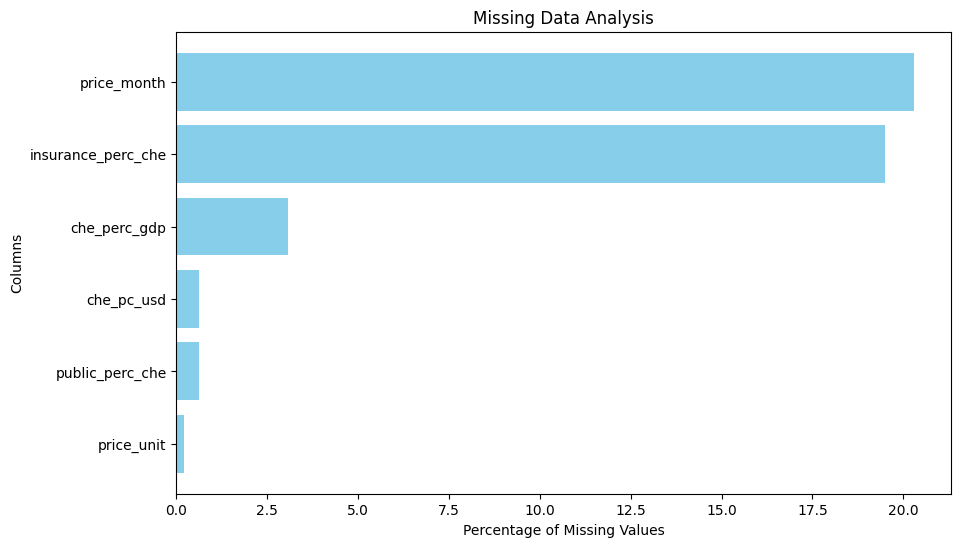

In [ ]:
# Create a DataFrame for easier analysis
missing_data = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing Percentage': missing_percentage
})

# Sort by the percentage of missing values (descending)
missing_data = missing_data[missing_data['Missing Count'] > 0].sort_values(by='Missing Percentage', ascending=False)

# Display the missing data summary
print("Missing Data Summary:")
print(missing_data)

# Visualize missing values as a bar plot
plt.figure(figsize=(10, 6))
plt.barh(missing_data.index, missing_data['Missing Percentage'], color='skyblue')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Columns')
plt.title('Missing Data Analysis')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

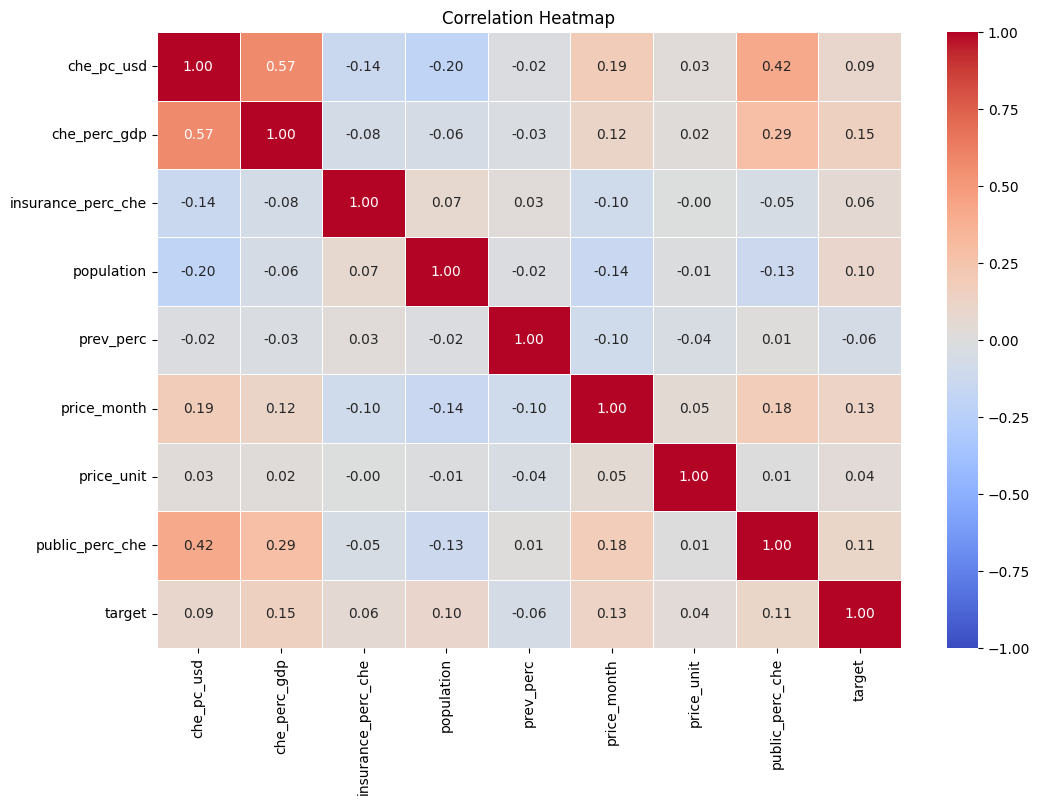

In [ ]:
import seaborn as sns
# Select only numerical columns (exclude categorical columns)
numerical_df = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Generate the heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

# Set plot title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

### Price_unit column

In [ ]:
# Convert valid date strings to datetime, coercing invalid entries to NaT (Not a Time)
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Extract month and year
data['date_month'] = data['date'].dt.month
data['date_year'] = data['date'].dt.year

# Filter rows where price_unit is -1
price_unit_missing = data[data['price_unit'] == -1]

# Count occurrences month-wise
monthwise_missing = price_unit_missing.groupby('date_month').size()

# Count occurrences year-wise
yearwise_missing = price_unit_missing.groupby('date_year').size()

# Print the results
print("Month-wise count of -1 in price_unit:")
print(monthwise_missing)

print("\nYear-wise count of -1 in price_unit:")
print(yearwise_missing)

Month-wise count of -1 in price_unit:
date_month
1     19
2     19
3     19
4     19
5     19
6     20
7     20
8     20
9     21
10    21
11    21
12    21
dtype: int64

Year-wise count of -1 in price_unit:
date_year
2016    11
2017    22
2018    28
2019    48
2020    48
2021    44
2022    38
dtype: int64


* Misisng values is uniform accross month.
* 2019,2020,2021 has more missing values

In [ ]:
# Explode the 'indication' list to create separate rows for each indication
data_exploded = data.explode('indication')

# Group by 'cluster_nl' and 'indication' and check for at least one valid price_unit
grouped_check = (
    data_exploded
    .groupby(['cluster_nl', 'indication'])['price_unit']
    .apply(lambda x: (x != -1).any())  # Check if at least one value is not -1
    .reset_index(name='Has_Valid_Price_Unit')  # Add result column
)

# Filter groups where no valid price_unit is found
no_valid_price_unit = grouped_check[~grouped_check['Has_Valid_Price_Unit']]

# Count the number of such groups
print(f"Total groups without a valid price_unit: {no_valid_price_unit.shape[0]}")

# Display the result
print("Groups without any valid price_unit:")
no_valid_price_unit




Total groups without a valid price_unit: 6
Groups without any valid price_unit:


,cluster_nl,indication,Has_Valid_Price_Unit
40,BRAND_0056_COUNTRY_EA71,['IND_FC21'],False
66,BRAND_014B_COUNTRY_EA71,['IND_A496'],False
347,BRAND_152E_COUNTRY_EA71,"['IND_851C', 'IND_0AE9', 'IND_176A', 'IND_632E...",False
2172,BRAND_B01A_COUNTRY_EA71,"['IND_B2EF', 'IND_7C11', 'IND_D5C1']",False
2173,BRAND_B01A_COUNTRY_EA71,"['IND_B2EF', 'IND_7C11']",False
2306,BRAND_BC1F_COUNTRY_EA71,"['IND_4D58', 'IND_8C60', 'IND_3518']",False


all the 6 indications with no price_unit is For country COUNTRY_EA71

<ipython-input-400-d04962a6eb1f>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


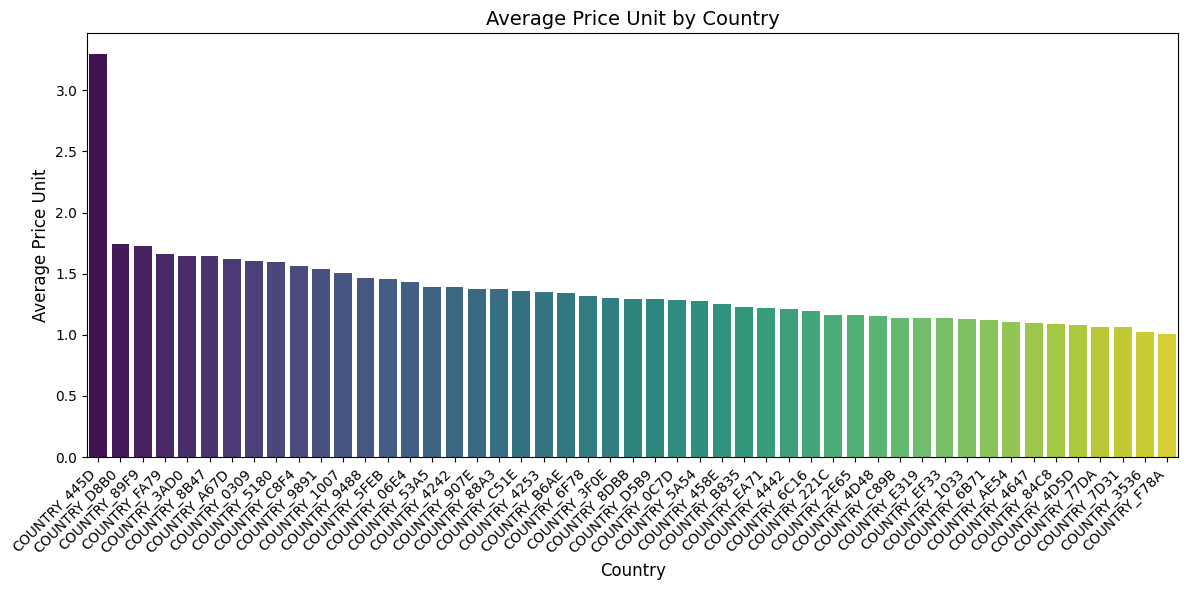

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Filter out missing values (-1)
filtered_data = data[data['price_unit'] != -1].copy()

# Convert price_unit to numeric if not already
filtered_data['price_unit'] = pd.to_numeric(filtered_data['price_unit'], errors='coerce')

# Calculate average price_unit by country
avg_price_unit_by_country = (
    filtered_data.groupby('country')['price_unit']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

# Visualization: Bar chart
plt.figure(figsize=(12, 6))
sns.barplot(
    data=avg_price_unit_by_country,
    x='country',
    y='price_unit',
    palette='viridis'
)
plt.xticks(rotation=45, ha='right')
plt.title('Average Price Unit by Country', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Average Price Unit', fontsize=12)
plt.tight_layout()
plt.show()


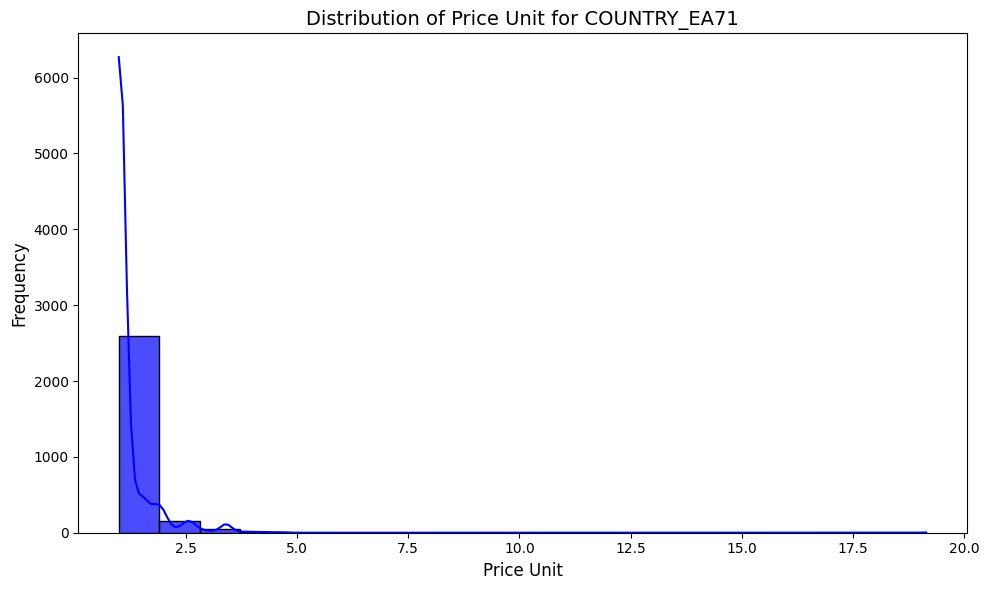

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for the specific country and exclude missing values (-1)
country_data = data[(data['country'] == 'COUNTRY_EA71') & (data['price_unit'] != -1)].copy()

# Convert price_unit to numeric if necessary
country_data['price_unit'] = pd.to_numeric(country_data['price_unit'], errors='coerce')

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(country_data['price_unit'], bins=20, kde=True, color='blue', alpha=0.7)
plt.title('Distribution of Price Unit for COUNTRY_EA71', fontsize=14)
plt.xlabel('Price Unit', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:
import ast

# Convert string representations of lists into actual lists
data['indication'] = data['indication'].apply(ast.literal_eval)

# Now, create the 'indication_count' column
data['indication_count'] = data['indication'].apply(len)

# Verify the result
data[['indication', 'indication_count']]


,indication,indication_count
0,[IND_C3B6],1
1,"[IND_1590, IND_ECAC]",2
2,[IND_B2EF],1
3,[IND_BAFB],1
4,[IND_3F31],1
...,...,...
118912,[IND_A496],1
118913,[IND_617C],1
118914,[IND_FC21],1
118915,[IND_B2EF],1


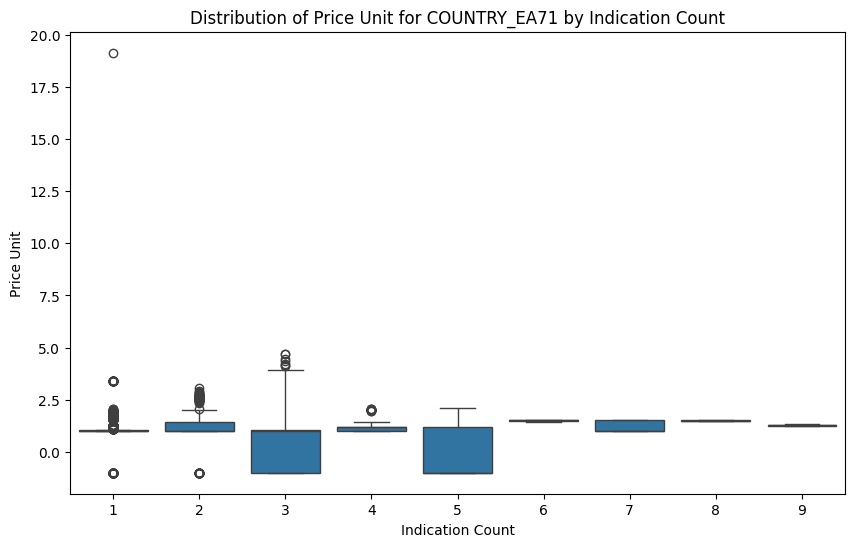

In [ ]:
# Filter the data for COUNTRY_EA71
country_data = data[data['country'] == 'COUNTRY_EA71']

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='indication_count', y='price_unit', data=country_data)

# Set the plot labels and title
plt.title('Distribution of Price Unit for COUNTRY_EA71 by Indication Count')
plt.xlabel('Indication Count')
plt.ylabel('Price Unit')

# Show the plot
plt.show()

In [ ]:
# Filter the data for COUNTRY_EA71
country_data = data[data['country'] == 'COUNTRY_EA71']

# Group by indication_count and find the most frequent price_unit
most_frequent_price_unit = country_data.groupby('indication_count')['price_unit'].agg(lambda x: x.mode().iloc[0])

# Print the result
most_frequent_price_unit


,price_unit
indication_count,
1,-1.000000
2,-1.000000
3,-1.000000
4,1.158965
5,-1.000000
6,1.448760
7,1.001131
8,1.479584
9,1.235557


In [ ]:
unit_drug = country_data.groupby(['indication_count', 'drug_id'])['price_unit'].describe()
unit_drug

count      mean       std       min       25%  \
indication_count drug_id                                                       
1                DRUG_ID_07FE   25.0  1.718658  0.044623  1.595704  1.696459   
                 DRUG_ID_16F3   60.0  1.053064  0.005848  1.028011  1.052230   
                 DRUG_ID_1B59   54.0  1.038311  0.008816  1.027608  1.030906   
                 DRUG_ID_1D4E   60.0  1.004453  0.000291  1.003952  1.004157   
                 DRUG_ID_20C2   10.0  1.010745  0.009240  1.001999  1.004312   
...                              ...       ...       ...       ...       ...   
7                DRUG_ID_0B7B   27.0  1.001203  0.000046  1.001131  1.001156   
                 DRUG_ID_7D8C    2.0  1.272890  0.011612  1.264680  1.268785   
                 DRUG_ID_B8A8   16.0  1.522920  0.013024  1.496647  1.515230   
8                DRUG_ID_B8A8   12.0  1.500157  0.010939  1.479584  1.492886   
9                DRUG_ID_7D8C   41.0  1.272125  0.023116  1.235557  1.252953   

                                    50%       75%       max  
indication_count drug_id                                     
1                DRUG_ID_07FE  1.727158  1.759222  1.776780  
                 DRUG_ID_16F3  1.054930  1.056548  1.059933  
                 DRUG_ID_1B59  1.032941  1.048693  1.051865  
                 DRUG_ID_1D4E  1.004497  1.004669  1.004931  
                 DRUG_ID_20C2  1.008185  1.013099  1.032610  
...                                 ...       ...       ...  
7                DRUG_ID_0B7B  1.001225  1.001235  1.001267  
                 DRUG_ID_7D8C  1.272890  1.276996  1.281101  
                 DRUG_ID_B8A8  1.523525  1.534979  1.540597  
8                DRUG_ID_B8A8  1.500630  1.509807  1.511366  
9                DRUG_ID_7D8C  1.267952  1.290923  1.315715  

[76 rows x 8 columns]

In [ ]:
unit_drug.head(30)

count      mean           std       min  \
indication_count drug_id                                                 
1                DRUG_ID_07FE   25.0  1.718658  4.462316e-02  1.595704   
                 DRUG_ID_16F3   60.0  1.053064  5.848201e-03  1.028011   
                 DRUG_ID_1B59   54.0  1.038311  8.816269e-03  1.027608   
                 DRUG_ID_1D4E   60.0  1.004453  2.908026e-04  1.003952   
                 DRUG_ID_20C2   10.0  1.010745  9.239998e-03  1.001999   
                 DRUG_ID_25F1   60.0  1.005526  4.821277e-04  1.004286   
                 DRUG_ID_2832   28.0  1.012056  5.479395e-04  1.010621   
                 DRUG_ID_2A56   60.0  1.008535  1.699871e-03  1.005267   
                 DRUG_ID_2D81   60.0  1.024600  4.905102e-03  1.015574   
                 DRUG_ID_2F7D   35.0  3.407330  2.252863e-15  3.407330   
                 DRUG_ID_318B   60.0  1.007004  3.397915e-04  1.006230   
                 DRUG_ID_372D   37.0  1.004296  1.548159e-04  1.004071   
                 DRUG_ID_473B   49.0  1.012013  6.471679e-04  1.010985   
                 DRUG_ID_5417   15.0  1.265527  2.930613e-02  1.210197   
                 DRUG_ID_645E   60.0  1.119870  1.722549e-02  1.000000   
                 DRUG_ID_6CE8   57.0  1.018627  7.006493e-04  1.016758   
                 DRUG_ID_7129   40.0  1.029040  1.383660e-03  1.026067   
                 DRUG_ID_71A8   48.0  1.006288  7.150280e-04  1.005406   
                 DRUG_ID_79D8   37.0  1.022436  6.146833e-03  1.005017   
                 DRUG_ID_7DA2   31.0  1.030825  8.170985e-03  1.010288   
                 DRUG_ID_8795   60.0  1.010236  5.269829e-04  1.009197   
                 DRUG_ID_92F5   58.0  1.009192  3.370576e-04  1.008419   
                 DRUG_ID_933E   60.0  1.011476  4.768432e-04  1.010753   
                 DRUG_ID_947E   60.0  1.002596  1.207763e-04  1.002409   
                 DRUG_ID_97F6   30.0  1.118822  6.523053e-03  1.102891   
                 DRUG_ID_AA88   29.0  1.020333  7.708211e-04  1.019197   
                 DRUG_ID_B0E9   24.0  1.031489  1.031260e-02  1.006519   
                 DRUG_ID_B2B0   60.0  1.006478  4.340794e-04  1.005418   
                 DRUG_ID_B7E2   58.0  1.585922  3.623035e-02  1.507470   
                 DRUG_ID_B8BC   60.0  1.007737  2.985994e-04  1.007203   

                                    25%       50%       75%       max  
indication_count drug_id                                               
1                DRUG_ID_07FE  1.696459  1.727158  1.759222  1.776780  
                 DRUG_ID_16F3  1.052230  1.054930  1.056548  1.059933  
                 DRUG_ID_1B59  1.030906  1.032941  1.048693  1.051865  
                 DRUG_ID_1D4E  1.004157  1.004497  1.004669  1.004931  
                 DRUG_ID_20C2  1.004312  1.008185  1.013099  1.032610  
                 DRUG_ID_25F1  1.005263  1.005625  1.005798  1.006713  
                 DRUG_ID_2832  1.011724  1.012238  1.012462  1.012785  
                 DRUG_ID_2A56  1.007796  1.008078  1.008634  1.013060  
                 DRUG_ID_2D81  1.021462  1.024961  1.028366  1.037936  
                 DRUG_ID_2F7D  3.407330  3.407330  3.407330  3.407330  
                 DRUG_ID_318B  1.006826  1.007068  1.007254  1.007690  
                 DRUG_ID_372D  1.004165  1.004262  1.004431  1.004559  
                 DRUG_ID_473B  1.011528  1.011917  1.012305  1.014078  
                 DRUG_ID_5417  1.236810  1.281393  1.289880  1.293897  
                 DRUG_ID_645E  1.115435  1.122961  1.126489  1.135787  
                 DRUG_ID_6CE8  1.018130  1.018555  1.019092  1.019880  
                 DRUG_ID_7129  1.028244  1.028949  1.030155  1.031123  
                 DRUG_ID_71A8  1.005826  1.005997  1.006634  1.007992  
                 DRUG_ID_79D8  1.017837  1.023190  1.027104  1.030936  
                 DRUG_ID_7DA2  1.029613  1.031303  1.032349  1.064702  
                 DRUG_ID_8795  1.009804  1.010208  1.010649  1.011378  
      

In [ ]:
unit_drug.tail(30)

count      mean       std       min       25%  \
indication_count drug_id                                                       
2                DRUG_ID_B1AD   53.0  1.004169  0.000174  1.003906  1.004015   
                 DRUG_ID_B7E2    2.0  1.558261  0.036989  1.532106  1.545183   
                 DRUG_ID_BCFF   60.0  1.037533  0.013224  1.000000  1.029389   
                 DRUG_ID_D8C3   60.0  1.624576  0.226885  1.406642  1.464148   
3                DRUG_ID_24A2   52.0 -1.000000  0.000000 -1.000000 -1.000000   
                 DRUG_ID_4730   31.0  1.024212  0.006703  1.011228  1.019953   
                 DRUG_ID_5417    8.0  1.203412  0.003365  1.198079  1.201449   
                 DRUG_ID_5657   60.0  1.018022  0.001138  1.016000  1.016990   
                 DRUG_ID_7773   31.0 -1.000000  0.000000 -1.000000 -1.000000   
                 DRUG_ID_7D43   60.0  1.018127  0.002287  1.014396  1.015768   
                 DRUG_ID_A3F0    4.0  2.089781  0.067359  2.022533  2.050564   
                 DRUG_ID_B8A8    7.0  1.344680  0.016794  1.320283  1.333819   
                 DRUG_ID_BE19   60.0  2.808938  0.879536  1.000000  2.192729   
4                DRUG_ID_37C9   60.0  1.007295  0.000705  1.006134  1.006682   
                 DRUG_ID_3A6F  107.0  1.192187  0.013020  1.153742  1.184442   
                 DRUG_ID_5417   18.0  1.197965  0.011354  1.168947  1.197266   
                 DRUG_ID_7D8C   12.0  1.309900  0.076179  1.209806  1.235074   
                 DRUG_ID_A3F0   14.0  2.012966  0.029231  1.973689  1.990336   
                 DRUG_ID_B8A8   14.0  1.424702  0.015843  1.402114  1.412241   
5                DRUG_ID_5417   19.0  1.181454  0.005845  1.168252  1.178410   
                 DRUG_ID_7D8C    5.0  1.244210  0.016970  1.224061  1.237806   
                 DRUG_ID_A3F0   14.0  2.038923  0.021358  1.998444  2.025861   
                 DRUG_ID_A56F   60.0 -1.000000  0.000000 -1.000000 -1.000000   
                 DRUG_ID_B8A8    1.0  1.433358       NaN  1.433358  1.433358   
6                DRUG_ID_B8A8    9.0  1.510894  0.041357  1.448760  1.470220   
7                DRUG_ID_0B7B   27.0  1.001203  0.000046  1.001131  1.001156   
                 DRUG_ID_7D8C    2.0  1.272890  0.011612  1.264680  1.268785   
                 DRUG_ID_B8A8   16.0  1.522920  0.013024  1.496647  1.515230   
8                DRUG_ID_B8A8   12.0  1.500157  0.010939  1.479584  1.492886   
9                DRUG_ID_7D8C   41.0  1.272125  0.023116  1.235557  1.252953   

                                    50%       75%       max  
indication_count drug_id                                     
2                DRUG_ID_B1AD  1.004143  1.004299  1.004536  
                 DRUG_ID_B7E2  1.558261  1.571338  1.584416  
                 DRUG_ID_BCFF  1.034711  1.045252  1.064815  
                 DRUG_ID_D8C3  1.484855  1.839713  2.069143  
3                DRUG_ID_24A2 -1.000000 -1.000000 -1.000000  
                 DRUG_ID_4730  1.022784  1.028617  1.043625  
                 DRUG_ID_5417  1.204293  1.205125  1.208136  
                 DRUG_ID_5657  1.018152  1.019051  1.019687  
                 DRUG_ID_7773 -1.000000 -1.000000 -1.000000  
                 DRUG_ID_7D43  1.019194  1.019965  1.021464  
                 DRUG_ID_A3F0  2.078265  2.117482  2.180060  
                 DRUG_ID_B8A8  1.346510  1.357016  1.364301  
                 DRUG_ID_BE19  2.582945  3.455053  4.688552  
4                DRUG_ID_37C9  1.007219  1.007959  1.008647  
                 DRUG_ID_3A6F  1.193386  1.199482  1.231329  
                 DRUG_ID_5417  1.202375  1.205464  1.207952  
                 DRUG_ID_7D8C  1.318249  1.392423  1.396107  
                 DRUG_ID_A3F0  2.006559  2.028834  2.058314  
                 DRUG_ID_B8A8  1.424396  1.435043  1.451485  
5                DRUG_ID_5417  1.181780  1.185334  1.189975  
                 DRUG_ID_7D8C  1.238532  1.251570  1.269081  
                 DRUG_ID_A3F0  2.036912  2.0

Correlation between indication_count and price_unit: -0.023776734790584605


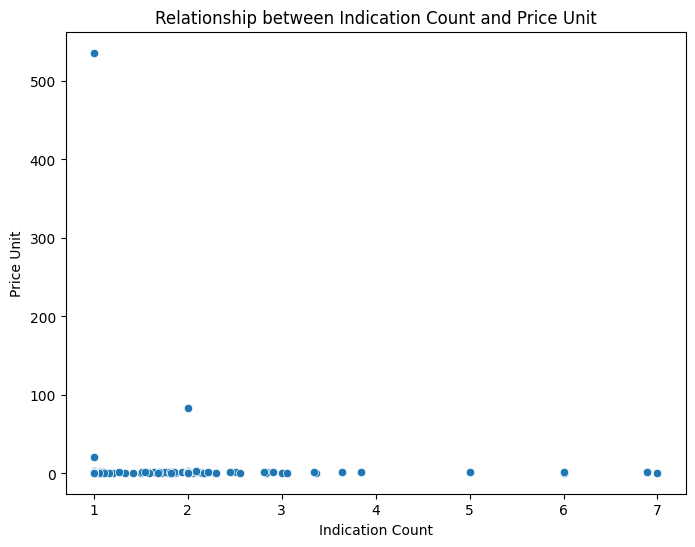

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by drug_id and get the mean indication_count and price_unit for each drug
grouped_data = data.groupby('drug_id').agg({
    'indication_count': 'mean',
    'price_unit': 'mean'
}).reset_index()

# Check the correlation between indication_count and price_unit
correlation = grouped_data['indication_count'].corr(grouped_data['price_unit'])

# Print the correlation coefficient
print(f"Correlation between indication_count and price_unit: {correlation}")

# Visualize the relationship between indication_count and price_unit
plt.figure(figsize=(8, 6))
sns.scatterplot(data=grouped_data, x='indication_count', y='price_unit')
plt.title("Relationship between Indication Count and Price Unit")
plt.xlabel('Indication Count')
plt.ylabel('Price Unit')
plt.show()


Increase in indication count does not increase the price_unit, as the correlation is -0.023

In [ ]:
'''
# Function to impute -1 values with the median for each group
def impute_with_median(group):
    median_value = group['price_unit'][group['price_unit'] != -1].median()
    group['price_unit'] = group['price_unit'].replace(-1, median_value)
    return group

# Group by country and drug_id, then apply the imputation function
data_imputed = data.groupby(['country', 'drug_id', 'indication_count'], group_keys=False).apply(impute_with_median)

# Check if the imputation worked
data_imputed[data_imputed['price_unit'] == -1]
'''

"\n# Function to impute -1 values with the median for each group\ndef impute_with_median(group):\n    median_value = group['price_unit'][group['price_unit'] != -1].median()\n    group['price_unit'] = group['price_unit'].replace(-1, median_value)\n    return group\n\n# Group by country and drug_id, then apply the imputation function\ndata_imputed = data.groupby(['country', 'drug_id', 'indication_count'], group_keys=False).apply(impute_with_median)\n\n# Check if the imputation worked\ndata_imputed[data_imputed['price_unit'] == -1]\n"

In [ ]:
# # Ensure 'price_unit' is numeric
# data['price_unit'] = pd.to_numeric(data['price_unit'], errors='coerce')

# # Define a function to handle group-wise imputation
# def impute_with_median(series):
#     # Calculate the median excluding -1
#     median_value = series[series != -1].median()
#     # Replace -1 with the median, if a valid median exists
#     if pd.isna(median_value):  # If median is NaN (e.g., group with all -1s)
#         return series
#     return series.replace(-1, median_value)

# # Apply the function group-wise
# data['price_unit'] = data.groupby(['country', 'drug_id', 'indication_count'])['price_unit'].transform(impute_with_median)

# # Verify if there are any remaining -1 or missing values
# remaining_negative_ones = (data['price_unit'] == -1).sum()
# remaining_missing_values = data['price_unit'].isnull().sum()

# print(f"Remaining -1 values in price_unit: {remaining_negative_ones}")
# print(f"Remaining missing values in price_unit: {remaining_missing_values}")

In [ ]:
# # Ensure 'price_unit' is numeric
# data['price_unit'] = pd.to_numeric(data['price_unit'], errors='coerce')

# # Function to impute -1 values with the group median
# def impute_with_median(series):
#     # Calculate the median excluding -1
#     median_value = series[series != -1].median()
#     # Replace ONLY -1 values with the median (if a valid median exists)
#     return series.apply(lambda x: median_value if x == -1 and not pd.isna(median_value) else x)

# # Apply group-wise imputation
# data['price_unit'] = data.groupby(['country', 'drug_id', 'indication_count'])['price_unit'].transform(impute_with_median)

# # Verify results
# remaining_negative_ones = (data['price_unit'] == -1).sum()
# remaining_missing_values = data['price_unit'].isnull().sum()

# print(f"Remaining -1 values in price_unit: {remaining_negative_ones}")
# print(f"Remaining missing values in price_unit: {remaining_missing_values}")


In [ ]:
# Calculate the global median for fallback (excluding -1 values)
global_median = data.loc[data['price_unit'] != -1, 'price_unit'].median()

# Function to calculate median for a group and return replacement values
def calculate_group_median(group):
    # Calculate the median for valid (non -1) values in the group
    valid_median = group.loc[group['price_unit'] != -1, 'price_unit'].median()
    # Use the global median as fallback if no valid median exists
    return valid_median if not pd.isna(valid_median) else global_median

# Create a dictionary to store the median for each group
group_median_map = {
    group_name: calculate_group_median(group_data)
    for group_name, group_data in data.groupby(['country', 'drug_id', 'indication_count'])
}

# Update only the rows where price_unit is -1
data.loc[data['price_unit'] == -1, 'price_unit'] = data.loc[data['price_unit'] == -1].apply(
    lambda row: group_median_map.get((row['country'], row['drug_id'], row['indication_count']), global_median),
    axis=1
)

# Verify the results
print("Number of -1 values remaining:", (data['price_unit'] == -1).sum())

Number of -1 values remaining: 0


In [ ]:
grouped = data.groupby(['country', 'drug_id', 'indication_count'])['price_unit']
print("Group keys (first few):")
print(list(grouped.groups.keys())[:10])  # Display the first 10 group keys


Group keys (first few):
[('COUNTRY_0309', 'DRUG_ID_0259', 2), ('COUNTRY_0309', 'DRUG_ID_0259', 3), ('COUNTRY_0309', 'DRUG_ID_032B', 5), ('COUNTRY_0309', 'DRUG_ID_07FE', 2), ('COUNTRY_0309', 'DRUG_ID_16F3', 1), ('COUNTRY_0309', 'DRUG_ID_1B59', 1), ('COUNTRY_0309', 'DRUG_ID_1C54', 1), ('COUNTRY_0309', 'DRUG_ID_1C54', 2), ('COUNTRY_0309', 'DRUG_ID_1C54', 4), ('COUNTRY_0309', 'DRUG_ID_1D4E', 1)]


In [ ]:
# Group by the desired columns
grouped = data.groupby(['country', 'drug_id', 'indication_count'])

# Find groups where price_unit contains -1
groups_with_negative_one = [
    group_name for group_name, group_data in grouped
    if (group_data['price_unit'] == -1).any()
]

# Display the groups
print(f"Groups with -1 in price_unit: {groups_with_negative_one}")

Groups with -1 in price_unit: []


In [ ]:
# Group by the desired columns
grouped = data.groupby(['country', 'drug_id', 'indication_count'])

# Find the groups where price_unit contains -1 and calculate the median
group_median_values = {
    group_name: group_data.loc[group_data['price_unit'] != -1, 'price_unit'].median()
    for group_name, group_data in grouped
    if (group_data['price_unit'] == -1).any()
}

# Display the results
print("Median values of price_unit for groups with -1:")
for group_name, median_value in group_median_values.items():
    print(f"Group: {group_name}, Median: {median_value}")


Median values of price_unit for groups with -1:


In [ ]:
# Calculate the global median, excluding -1 values
global_median = data.loc[data['price_unit'] != -1, 'price_unit'].median()

# Group by the desired columns
grouped = data.groupby(['country', 'drug_id', 'indication_count'])

# Find the groups with -1 and calculate the median with fallback
group_median_values = {
    group_name: (
        group_data.loc[group_data['price_unit'] != -1, 'price_unit'].median()
        if not group_data.loc[group_data['price_unit'] != -1, 'price_unit'].empty
        else global_median  # Use global median if no valid values in the group
    )
    for group_name, group_data in grouped
    if (group_data['price_unit'] == -1).any()
}

# Display the results
print("Median values of price_unit for groups with -1 (fallback applied):")
for group_name, median_value in group_median_values.items():
    print(f"Group: {group_name}, Median: {median_value}")


Median values of price_unit for groups with -1 (fallback applied):


In [ ]:
data[data['price_unit'] == -1]

,brand,che_pc_usd,che_perc_gdp,cluster_nl,corporation,country,launch_date,date,drug_id,ind_launch_date,...,population,prev_perc,price_month,price_unit,public_perc_che,therapeutic_area,target,date_month,date_year,indication_count


In [ ]:

# Check unique values in price_unit
print(data['price_unit'].unique())

# Check if grouping columns have missing values
print(data[['country', 'drug_id', 'indication_count']].isnull().sum())


[1.01378358 1.62667669 3.1448743  ... 1.01830999 2.49091147 1.00268852]
country             0
drug_id             0
indication_count    0
dtype: int64


In [ ]:
# Check the groups
grouped = data.groupby(['country', 'drug_id', 'indication_count'])
print(f"Number of groups: {len(grouped)}")

# Inspect a specific group
for name, group in grouped:
    print(f"Group: {name}")
    print(group)
    break

Number of groups: 2828
Group: ('COUNTRY_0309', 'DRUG_ID_0259', 2)
            brand  che_pc_usd  che_perc_gdp               cluster_nl  \
42853  BRAND_4EAC    1.723939      1.938012  BRAND_4EAC_COUNTRY_0309   
44656  BRAND_4EAC    1.723939      1.938012  BRAND_4EAC_COUNTRY_0309   
46650  BRAND_4EAC    1.723939      1.938012  BRAND_4EAC_COUNTRY_0309   
48447  BRAND_4EAC    1.723939      1.938012  BRAND_4EAC_COUNTRY_0309   
49445  BRAND_4EAC    1.723939      1.938012  BRAND_4EAC_COUNTRY_0309   

      corporation       country launch_date       date       drug_id  \
42853   CORP_39F7  COUNTRY_0309  2019-02-01 2019-02-01  DRUG_ID_0259   
44656   CORP_39F7  COUNTRY_0309  2019-02-01 2019-03-01  DRUG_ID_0259   
46650   CORP_39F7  COUNTRY_0309  2019-02-01 2019-04-01  DRUG_ID_0259   
48447   CORP_39F7  COUNTRY_0309  2019-02-01 2019-05-01  DRUG_ID_0259   
49445   CORP_39F7  COUNTRY_0309  2019-02-01 2019-06-01  DRUG_ID_0259   

           ind_launch_date  ... population  prev_perc  price_month  

In [ ]:
# # Ensure 'che_perc_gdp' is numeric (if it's not already)
# data['price_unit'] = pd.to_numeric(data['price_unit'], errors='coerce')

# # Perform group-wise imputation of -1 with the median value for each 'country' and 'date_year'
# data['price_unit'] = data.groupby(['country',  'drug_id', 'indication_count'])['price_month'].transform(
#     lambda x: x.replace(-1, x.median()) if not x.isnull().all() else x
# )

# # Verify if there are any remaining missing values after imputation
# print(f"Remaining missing values in price_unit: {data['price_unit'].isnull().sum()}")

# # Optional: You can also check how many -1 values were replaced
# print(f"Number of values replaced: {(data['price_unit'] == -1).sum()}")

Imputed the -1 values in price_unit by grouping country, indication_count and drug_id

#### price_month

In [ ]:
# Filter rows where price_month is -1
price_unit_missing = data[data['price_month'] == -1]

# Count occurrences month-wise
monthwise_missing = price_unit_missing.groupby('date_month').size()

# Count occurrences year-wise
yearwise_missing = price_unit_missing.groupby('date_year').size()

# Print the results
print("Month-wise count of -1 in price_month:")
print(monthwise_missing)

print("\nYear-wise count of -1 in price_month:")
print(yearwise_missing)

Month-wise count of -1 in price_month:
date_month
1     1735
2     1794
3     1838
4     1886
5     1932
6     1981
7     2029
8     2083
9     2136
10    2192
11    2242
12    2304
dtype: int64

Year-wise count of -1 in price_month:
date_year
2014     267
2015    1363
2016    2163
2017    3215
2018    3942
2019    4217
2020    3387
2021    2951
2022    2647
dtype: int64


Missing values are uniform accross month and year

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


# Assume 'data' is your DataFrame with 'price_month' as the target column
X = data.drop(columns=['price_month', 'ind_launch_date', 'launch_date','date'])
y = data['price_month']

# Encode categorical variables if necessary
label_encoder = LabelEncoder()

# Apply encoding to categorical columns
categorical_columns = ['brand', 'country', 'cluster_nl', 'corporation','drug_id', 'indication', 'therapeutic_area']  # replace with actual column names
for col in categorical_columns:
    X[col] = label_encoder.fit_transform(X[col].astype(str))

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.tree import DecisionTreeRegressor

# Train Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

# Get feature importance
feature_importance_dt = dt.feature_importances_

# Create a DataFrame for better visualization
feature_df_dt = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance_dt
}).sort_values(by='Importance', ascending=False)

print(feature_df_dt)


               Feature  Importance
13    therapeutic_area    0.315079
11          price_unit    0.107134
10           prev_perc    0.077653
6              drug_id    0.075142
12     public_perc_che    0.063570
1           che_pc_usd    0.056775
9           population    0.054018
4          corporation    0.045282
8   insurance_perc_che    0.038581
5              country    0.033720
3           cluster_nl    0.027501
7           indication    0.022718
14              target    0.021287
16           date_year    0.017650
2         che_perc_gdp    0.016208
17    indication_count    0.013990
0                brand    0.013269
15          date_month    0.000422


In [ ]:
'''
# Function to impute -1 values with the median for each group
def impute_with_median(group):
    median_value = group['price_month'][group['price_month'] != -1].median()
    group['price_month'] = group['price_month'].replace(-1, median_value)
    return group

# Group by country and drug_id, then apply the imputation function
data_imputed = data_imputed.groupby(['country', 'brand', 'therapeutic_area'], group_keys=False).apply(impute_with_median)

# Check if the imputation worked
data_imputed[data_imputed['price_month'] == -1]
'''

"\n# Function to impute -1 values with the median for each group\ndef impute_with_median(group):\n    median_value = group['price_month'][group['price_month'] != -1].median()\n    group['price_month'] = group['price_month'].replace(-1, median_value)\n    return group\n\n# Group by country and drug_id, then apply the imputation function\ndata_imputed = data_imputed.groupby(['country', 'brand', 'therapeutic_area'], group_keys=False).apply(impute_with_median)\n\n# Check if the imputation worked\ndata_imputed[data_imputed['price_month'] == -1]\n"

In [ ]:
# # Ensure 'che_perc_gdp' is numeric (if it's not already)
# data['price_month'] = pd.to_numeric(data['price_month'], errors='coerce')

# # Perform group-wise imputation of -1 with the median value for each 'country' and 'date_year'
# data['price_month'] = data.groupby(['country',  'brand', 'therapeutic_area'])['price_month'].transform(
#     lambda x: x.replace(-1, x.median()) if not x.isnull().all() else x
# )

# # Verify if there are any remaining missing values after imputation
# print(f"Remaining missing values in price_month: {data['price_month'].isnull().sum()}")

# # Optional: You can also check how many -1 values were replaced
# print(f"Number of values replaced: {(data['price_month'] == -1).sum()}")

In [ ]:
# Calculate the global median for fallback (excluding -1 values)
global_median_price_month = data.loc[data['price_month'] != -1, 'price_month'].median()

# Function to calculate the median for a group and return replacement values
def calculate_group_price_month_median(group):
    # Calculate the median for valid (non -1) values in the group
    valid_median = group.loc[group['price_month'] != -1, 'price_month'].median()
    # Use the global median as fallback if no valid median exists
    return valid_median if not pd.isna(valid_median) else global_median_price_month

# Create a dictionary to store the median for each group
group_median_price_month_map = {
    group_name: calculate_group_price_month_median(group_data)
    for group_name, group_data in data.groupby(['country', 'brand', 'therapeutic_area'])
}

# Update only the rows where price_month is -1
data.loc[data['price_month'] == -1, 'price_month'] = data.loc[data['price_month'] == -1].apply(
    lambda row: group_median_price_month_map.get(
        (row['country'], row['brand'], row['therapeutic_area']),
        global_median_price_month
    ),
    axis=1
)

# Verify the results
print("Number of -1 values remaining in price_month:", (data['price_month'] == -1).sum())


Number of -1 values remaining in price_month: 0


Imputed the -1 values in price_month by grouping country, brand and therapeutic_area

### che_perc_gdp

In [ ]:
'''
# Function to impute -1 values with the median for each group
def impute_with_median(group):
    median_value = group['che_perc_gdp'][group['che_perc_gdp'] != -1].median()
    group['che_perc_gdp'] = group['che_perc_gdp'].replace(-1, median_value)
    return group

# Group by country and drug_id, then apply the imputation function
data_imputed = data_imputed.groupby(['country', 'date_year'], group_keys=False).apply(impute_with_median)

# Check if the imputation worked
data_imputed[data_imputed['che_perc_gdp'] == -1]
'''

"\n# Function to impute -1 values with the median for each group\ndef impute_with_median(group):\n    median_value = group['che_perc_gdp'][group['che_perc_gdp'] != -1].median()\n    group['che_perc_gdp'] = group['che_perc_gdp'].replace(-1, median_value)\n    return group\n\n# Group by country and drug_id, then apply the imputation function\ndata_imputed = data_imputed.groupby(['country', 'date_year'], group_keys=False).apply(impute_with_median)\n\n# Check if the imputation worked\ndata_imputed[data_imputed['che_perc_gdp'] == -1]\n"

In [ ]:
# # Ensure 'che_perc_gdp' is numeric (if it's not already)
# data['che_perc_gdp'] = pd.to_numeric(data['che_perc_gdp'], errors='coerce')

# # Perform group-wise imputation of -1 with the median value for each 'country' and 'date_year'
# data['che_perc_gdp'] = data.groupby(['country', 'date_year'])['che_perc_gdp'].transform(
#     lambda x: x.replace(-1, x.median()) if not x.isnull().all() else x
# )

# # Verify if there are any remaining missing values after imputation
# print(f"Remaining missing values in che_perc_gdp: {data['che_perc_gdp'].isnull().sum()}")

# # Optional: You can also check how many -1 values were replaced
# print(f"Number of values replaced: {(data['che_perc_gdp'] == -1).sum()}")


In [ ]:
# Calculate the global median for fallback (excluding -1 values)
global_median_che_perc_gdp = data.loc[data['che_perc_gdp'] != -1, 'che_perc_gdp'].median()

# Function to calculate the median for a group and return replacement values
def calculate_group_che_perc_gdp_median(group):
    # Calculate the median for valid (non -1) values in the group
    valid_median = group.loc[group['che_perc_gdp'] != -1, 'che_perc_gdp'].median()
    # Use the global median as fallback if no valid median exists
    return valid_median if not pd.isna(valid_median) else global_median_che_perc_gdp

# Create a dictionary to store the median for each group
group_median_che_perc_gdp_map = {
    group_name: calculate_group_che_perc_gdp_median(group_data)
    for group_name, group_data in data.groupby(['country', 'date_year'])
}

# Update only the rows where che_perc_gdp is -1
data.loc[data['che_perc_gdp'] == -1, 'che_perc_gdp'] = data.loc[data['che_perc_gdp'] == -1].apply(
    lambda row: group_median_che_perc_gdp_map.get(
        (row['country'], row['date_year']),
        global_median_che_perc_gdp
    ),
    axis=1
)

# Verify the results
print("Number of -1 values remaining in che_perc_gdp:", (data['che_perc_gdp'] == -1).sum())


Number of -1 values remaining in che_perc_gdp: 0


grouped based on year and country as it is gdp

#### che_pc_usd

In [ ]:
'''
# Function to impute -1 values with the median for each group
def impute_with_median(group):
    median_value = group['che_pc_usd'][group['che_pc_usd'] != -1].median()
    group['che_pc_usd'] = group['che_pc_usd'].replace(-1, median_value)
    return group

# Group by country and drug_id, then apply the imputation function
data_imputed = data_imputed.groupby(['country', 'date_month'], group_keys=False).apply(impute_with_median)

# Check if the imputation worked
data_imputed[data_imputed['che_pc_usd'] == -1]
'''

"\n# Function to impute -1 values with the median for each group\ndef impute_with_median(group):\n    median_value = group['che_pc_usd'][group['che_pc_usd'] != -1].median()\n    group['che_pc_usd'] = group['che_pc_usd'].replace(-1, median_value)\n    return group\n\n# Group by country and drug_id, then apply the imputation function\ndata_imputed = data_imputed.groupby(['country', 'date_month'], group_keys=False).apply(impute_with_median)\n\n# Check if the imputation worked\ndata_imputed[data_imputed['che_pc_usd'] == -1]\n"

In [ ]:
# Calculate the global median for fallback (excluding -1 values)
global_median_che_pc_usd = data.loc[data['che_pc_usd'] != -1, 'che_pc_usd'].median()

# Function to calculate the median for a group and return replacement values
def calculate_group_che_pc_usd_median(group):
    # Calculate the median for valid (non -1) values in the group
    valid_median = group.loc[group['che_pc_usd'] != -1, 'che_pc_usd'].median()
    # Use the global median as fallback if no valid median exists
    return valid_median if not pd.isna(valid_median) else global_median_che_pc_usd

# Create a dictionary to store the median for each group
group_median_che_pc_usd_map = {
    group_name: calculate_group_che_pc_usd_median(group_data)
    for group_name, group_data in data.groupby(['country', 'date_year'])
}

# Update only the rows where che_pc_usd is -1
data.loc[data['che_pc_usd'] == -1, 'che_pc_usd'] = data.loc[data['che_pc_usd'] == -1].apply(
    lambda row: group_median_che_pc_usd_map.get(
        (row['country'], row['date_year']),
        global_median_che_pc_usd
    ),
    axis=1
)

# Verify the results
print("Number of -1 values remaining in che_pc_usd:", (data['che_pc_usd'] == -1).sum())


Number of -1 values remaining in che_pc_usd: 0


In [ ]:
# # Ensure 'che_perc_gdp' is numeric (if it's not already)
# data['che_pc_usd'] = pd.to_numeric(data['che_pc_usd'], errors='coerce')

# # Perform group-wise imputation of -1 with the median value for each 'country' and 'date_year'
# data['che_pc_usd'] = data.groupby(['country', 'date_month'])['che_pc_usd'].transform(
#     lambda x: x.replace(-1, x.median()) if not x.isnull().all() else x
# )

# # Verify if there are any remaining missing values after imputation
# print(f"Remaining missing values in che_perc_gdp: {data['che_pc_usd'].isnull().sum()}")

# # Optional: You can also check how many -1 values were replaced
# print(f"Number of values replaced: {(data['che_pc_usd'] == -1).sum()}")

In [ ]:
# Calculate the global median for fallback (excluding -1 values)
global_median_che_perc_gdp = data.loc[data['che_perc_gdp'] != -1, 'che_perc_gdp'].median()

# Function to calculate the median for a group and return replacement values
def calculate_group_che_perc_gdp_median(group):
    # Calculate the median for valid (non -1) values in the group
    valid_median = group.loc[group['che_perc_gdp'] != -1, 'che_perc_gdp'].median()
    # Use the global median as fallback if no valid median exists
    return valid_median if not pd.isna(valid_median) else global_median_che_perc_gdp

# Create a dictionary to store the median for each group
group_median_che_perc_gdp_map = {
    group_name: calculate_group_che_perc_gdp_median(group_data)
    for group_name, group_data in data.groupby(['country', 'date_year'])
}

# Update only the rows where che_perc_gdp is -1
data.loc[data['che_perc_gdp'] == -1, 'che_perc_gdp'] = data.loc[data['che_perc_gdp'] == -1].apply(
    lambda row: group_median_che_perc_gdp_map.get(
        (row['country'], row['date_year']),
        global_median_che_perc_gdp
    ),
    axis=1
)

# Verify the results
print("Number of -1 values remaining in che_perc_gdp:", (data['che_perc_gdp'] == -1).sum())


Number of -1 values remaining in che_perc_gdp: 0


In [ ]:
data.head()

,brand,che_pc_usd,che_perc_gdp,cluster_nl,corporation,country,launch_date,date,drug_id,ind_launch_date,...,population,prev_perc,price_month,price_unit,public_perc_che,therapeutic_area,target,date_month,date_year,indication_count
0,BRAND_354E,1.209114,1.665879,BRAND_354E_COUNTRY_88A3,CORP_D524,COUNTRY_88A3,2014-06-01,2014-06-01,DRUG_ID_8795,-1,...,1.008039,0.028367,1.006444,1.013784,1.835821,THER_AREA_980E,1.000784,6,2014,1
1,BRAND_626D,1.472378,1.753338,BRAND_626D_COUNTRY_8B47,CORP_01C7,COUNTRY_8B47,2014-06-01,2014-06-01,DRUG_ID_E66E,2014-09-01 00:00:00,...,1.023562,0.000047,1.121036,1.626677,-1.000000,THER_AREA_96D7,1.000000,6,2014,2
2,BRAND_45D9,1.209114,1.665879,BRAND_45D9_COUNTRY_88A3,CORP_39F7,COUNTRY_88A3,2014-06-01,2014-06-01,DRUG_ID_F272,-1,...,1.008039,0.001502,2.073630,3.144874,1.835821,THER_AREA_96D7,1.002258,6,2014,1
3,BRAND_D724,1.851280,2.051770,BRAND_D724_COUNTRY_445D,CORP_711A,COUNTRY_445D,2014-06-01,2014-06-01,DRUG_ID_1D4E,-1,...,1.253186,0.001304,1.121036,1.213446,1.805970,THER_AREA_6CEE,1.068761,6,2014,1
4,BRAND_4887,1.791199,2.059130,BRAND_4887_COUNTRY_D8B0,CORP_443D,COUNTRY_D8B0,2014-06-01,2014-06-01,DRUG_ID_AA88,-1,...,1.639352,0.054467,1.018589,1.008708,1.880597,THER_AREA_6CEE,1.036312,6,2014,1


grouped based on month and country as it is per person spending

### public_perc_che

In [ ]:
'''
# Function to impute -1 values with the median for each group
def impute_with_median(group):
    median_value = group['public_perc_che'][group['public_perc_che'] != -1].median()
    group['public_perc_che'] = group['public_perc_che'].replace(-1, median_value)
    return group

# Group by country and drug_id, then apply the imputation function
data_imputed = data_imputed.groupby(['country', 'date_year'], group_keys=False).apply(impute_with_median)

# Check if the imputation worked
data_imputed[data_imputed['public_perc_che'] == -1]
'''

"\n# Function to impute -1 values with the median for each group\ndef impute_with_median(group):\n    median_value = group['public_perc_che'][group['public_perc_che'] != -1].median()\n    group['public_perc_che'] = group['public_perc_che'].replace(-1, median_value)\n    return group\n\n# Group by country and drug_id, then apply the imputation function\ndata_imputed = data_imputed.groupby(['country', 'date_year'], group_keys=False).apply(impute_with_median)\n\n# Check if the imputation worked\ndata_imputed[data_imputed['public_perc_che'] == -1]\n"

In [ ]:
# # Ensure 'che_perc_gdp' is numeric (if it's not already)
# data['public_perc_che'] = pd.to_numeric(data['public_perc_che'], errors='coerce')

# # Perform group-wise imputation of -1 with the median value for each 'country' and 'date_year'
# data['public_perc_che'] = data.groupby(['country', 'date_year'])['public_perc_che'].transform(
#     lambda x: x.replace(-1, x.median()) if not x.isnull().all() else x
# )

# # Verify if there are any remaining missing values after imputation
# print(f"Remaining missing values in che_perc_gdp: {data['public_perc_che'].isnull().sum()}")

# # Optional: You can also check how many -1 values were replaced
# print(f"Number of values replaced: {(data['public_perc_che'] == -1).sum()}")

In [ ]:
# Calculate the global median for fallback (excluding -1 values)
global_median_public_perc_che = data.loc[data['public_perc_che'] != -1, 'public_perc_che'].median()

# Function to calculate the median for a group and return replacement values
def calculate_group_public_perc_che_median(group):
    # Calculate the median for valid (non -1) values in the group
    valid_median = group.loc[group['public_perc_che'] != -1, 'public_perc_che'].median()
    # Use the global median as fallback if no valid median exists
    return valid_median if not pd.isna(valid_median) else global_median_public_perc_che

# Create a dictionary to store the median for each group
group_median_public_perc_che_map = {
    group_name: calculate_group_public_perc_che_median(group_data)
    for group_name, group_data in data.groupby(['country', 'date_year'])
}

# Update only the rows where public_perc_che is -1
data.loc[data['public_perc_che'] == -1, 'public_perc_che'] = data.loc[data['public_perc_che'] == -1].apply(
    lambda row: group_median_public_perc_che_map.get(
        (row['country'], row['date_year']),
        global_median_public_perc_che
    ),
    axis=1
)

# Verify the results
print("Number of -1 values remaining in public_perc_che:", (data['public_perc_che'] == -1).sum())


Number of -1 values remaining in public_perc_che: 0


### insurance_perc_che

In [ ]:
'''
# Function to impute -1 values with the median for each group
def impute_with_median(group):
    median_value = group['insurance_perc_che'][group['insurance_perc_che'] != -1].median()
    group['insurance_perc_che'] = group['insurance_perc_che'].replace(-1, median_value)
    return group

# Group by country and drug_id, then apply the imputation function
data_imputed = data_imputed.groupby(['country', 'date_year'], group_keys=False).apply(impute_with_median)

# Check if the imputation worked
data_imputed[data_imputed['insurance_perc_che'] == -1]
'''

"\n# Function to impute -1 values with the median for each group\ndef impute_with_median(group):\n    median_value = group['insurance_perc_che'][group['insurance_perc_che'] != -1].median()\n    group['insurance_perc_che'] = group['insurance_perc_che'].replace(-1, median_value)\n    return group\n\n# Group by country and drug_id, then apply the imputation function\ndata_imputed = data_imputed.groupby(['country', 'date_year'], group_keys=False).apply(impute_with_median)\n\n# Check if the imputation worked\ndata_imputed[data_imputed['insurance_perc_che'] == -1]\n"

In [ ]:
# # Ensure 'che_perc_gdp' is numeric (if it's not already)
# data['insurance_perc_che'] = pd.to_numeric(data['insurance_perc_che'], errors='coerce')

# # Perform group-wise imputation of -1 with the median value for each 'country' and 'date_year'
# data['insurance_perc_che'] = data.groupby(['country', 'date_year'])['insurance_perc_che'].transform(
#     lambda x: x.replace(-1, x.median()) if not x.isnull().all() else x
# )

# # Verify if there are any remaining missing values after imputation
# print(f"Remaining missing values in che_perc_gdp: {data['insurance_perc_che'].isnull().sum()}")

# # Optional: You can also check how many -1 values were replaced
# print(f"Number of values replaced: {(data['insurance_perc_che'] == -1).sum()}")

In [ ]:
# Calculate the global median for fallback (excluding -1 values)
global_median_insurance_perc_che = data.loc[data['insurance_perc_che'] != -1, 'insurance_perc_che'].median()

# Function to calculate the median for a group and return replacement values
def calculate_group_insurance_perc_che_median(group):
    # Calculate the median for valid (non -1) values in the group
    valid_median = group.loc[group['insurance_perc_che'] != -1, 'insurance_perc_che'].median()
    # Use the global median as fallback if no valid median exists
    return valid_median if not pd.isna(valid_median) else global_median_insurance_perc_che

# Create a dictionary to store the median for each group
group_median_insurance_perc_che_map = {
    group_name: calculate_group_insurance_perc_che_median(group_data)
    for group_name, group_data in data.groupby(['country', 'date_year'])
}

# Update only the rows where insurance_perc_che is -1
data.loc[data['insurance_perc_che'] == -1, 'insurance_perc_che'] = data.loc[data['insurance_perc_che'] == -1].apply(
    lambda row: group_median_insurance_perc_che_map.get(
        (row['country'], row['date_year']),
        global_median_insurance_perc_che
    ),
    axis=1
)

# Verify the results
print("Number of -1 values remaining in insurance_perc_che:", (data['insurance_perc_che'] == -1).sum())


Number of -1 values remaining in insurance_perc_che: 0


In [ ]:
missing_counts = (data == -1).sum()  # Count of -1 in each column
missing_percentage = (missing_counts / len(data)) * 100  # Percentage of missing values

In [ ]:
missing_counts

,0
brand,0
che_pc_usd,0
che_perc_gdp,0
cluster_nl,0
corporation,0
country,0
launch_date,0
date,0
drug_id,0
ind_launch_date,0


In [ ]:
data.isnull().sum()

,0
brand,0
che_pc_usd,0
che_perc_gdp,0
cluster_nl,0
corporation,0
country,0
launch_date,0
date,0
drug_id,0
ind_launch_date,0


In [ ]:
print(data[['country', 'date_year']].isnull().sum())  # Check for missing values in group columns

country      0
date_year    0
dtype: int64


Handled the numerical values except ind_launch_date

In [ ]:
# Save the dataframe to a CSV file
data.to_csv('semi_processed.csv', index=False)

#### ind_launch_date

In [ ]:
# Missing values in ind_launch_date

# Convert valid date strings to datetime, coercing invalid entries to NaT (Not a Time)
data['ind_launch_date'] = pd.to_datetime(data['ind_launch_date'], errors='coerce')

# Replace '-1' with NaT for consistency
data.loc[data['ind_launch_date'] == '-1', 'ind_launch_date'] = pd.NaT


# Count missing values
missing_count = data['ind_launch_date'].isna().sum()
total_count = len(data['ind_launch_date'])
missing_percentage = (missing_count / total_count) * 100

print(f"Total Missing Dates: {missing_count}")
print(f"Percentage Missing: {missing_percentage:.2f}%")

Total Missing Dates: 87797
Percentage Missing: 73.83%


<ipython-input-445-7d0edc5ddc24>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['ind_launch_date'] = pd.to_datetime(data['ind_launch_date'], errors='coerce')


In [ ]:
# Check patterns in missing values
missing_ind_dates = data[data['ind_launch_date'].isna()]

# Group by a related feature to identify patterns
missing_by_brand = missing_ind_dates.groupby('brand').size().sort_values(ascending=False)
print("Missing Dates by Brand:")
print(missing_by_brand)

missing_by_country = missing_ind_dates.groupby('country').size().sort_values(ascending=False)
print("Missing Dates by Country:")
print(missing_by_country)


Missing Dates by Brand:
brand
BRAND_62C7    1566
BRAND_0056    1498
BRAND_4048    1383
BRAND_A12A    1335
BRAND_7A2E    1332
              ... 
BRAND_B3AB       1
BRAND_8C0A       1
BRAND_EFD6       1
BRAND_ED1A       1
BRAND_8072       1
Length: 477, dtype: int64
Missing Dates by Country:
country
COUNTRY_907E    5252
COUNTRY_89F9    4622
COUNTRY_53A5    4590
COUNTRY_D8B0    4121
COUNTRY_4242    4048
COUNTRY_1007    3939
COUNTRY_445D    3848
COUNTRY_9891    3553
COUNTRY_0309    3472
COUNTRY_6F78    3471
COUNTRY_D5B9    3242
COUNTRY_06E4    3034
COUNTRY_FA79    3017
COUNTRY_EA71    2874
COUNTRY_5180    2694
COUNTRY_4D48    2627
COUNTRY_6C16    2555
COUNTRY_4442    2526
COUNTRY_3AD0    2253
COUNTRY_88A3    2217
COUNTRY_6B71    2176
COUNTRY_C8F4    2068
COUNTRY_4253    1993
COUNTRY_9488    1907
COUNTRY_A67D    1882
COUNTRY_0C7D    1715
COUNTRY_221C    1463
COUNTRY_AE54    1014
COUNTRY_8DBB     849
COUNTRY_3536     702
COUNTRY_C51E     697
COUNTRY_2E65     651
COUNTRY_B6AE     402
COUNTRY_

In [ ]:
# Filter rows where ind_launch_date is -1 or missing
missing_dates = data[data['ind_launch_date'] == '-1']

# Count the occurrences of -1 for each drug_id
missing_by_drug = missing_dates['drug_id'].value_counts()

# Compare with total occurrences of each drug_id
total_by_drug = data['drug_id'].value_counts()

# Create a DataFrame to analyze
missing_analysis = pd.DataFrame({
    'Total_Records': total_by_drug,
    'Missing_Records': missing_by_drug
}).fillna(0)  # Fill NaN (no missing values for that drug_id) with 0

# Add a flag to indicate if all records for a drug_id have missing ind_launch_date
missing_analysis['All_Missing'] = missing_analysis['Total_Records'] == missing_analysis['Missing_Records']

print(missing_analysis)


              Total_Records  Missing_Records  All_Missing
drug_id                                                  
DRUG_ID_0259           1363              0.0        False
DRUG_ID_026E              2              0.0        False
DRUG_ID_032B            402              0.0        False
DRUG_ID_0383            487              0.0        False
DRUG_ID_0424             60              0.0        False
...                     ...              ...          ...
DRUG_ID_FADD            156              0.0        False
DRUG_ID_FAE7             60              0.0        False
DRUG_ID_FD54            168              0.0        False
DRUG_ID_FD89             60              0.0        False
DRUG_ID_FDD8            294              0.0        False

[257 rows x 3 columns]


In [ ]:
missing_dates


,brand,che_pc_usd,che_perc_gdp,cluster_nl,corporation,country,launch_date,date,drug_id,ind_launch_date,...,population,prev_perc,price_month,price_unit,public_perc_che,therapeutic_area,target,date_month,date_year,indication_count


In [ ]:
# Specify the path and filename for the CSV
output_file_path = "output_data.csv"

# Save the DataFrame to a CSV file
data.to_csv(output_file_path, index=False)

print(f"DataFrame has been saved to {output_file_path}")

DataFrame has been saved to output_data.csv


In [ ]:
missing_counts = (data == -1).sum()  # Count of -1 in each column
missing_counts

,0
brand,0
che_pc_usd,0
che_perc_gdp,0
cluster_nl,0
corporation,0
country,0
launch_date,0
date,0
drug_id,0
ind_launch_date,0


In [ ]:
# Filter rows where all records for a drug_id have missing ind_launch_date
all_missing_true = missing_analysis[missing_analysis['All_Missing'] == True]

print(all_missing_true)


Empty DataFrame
Columns: [Total_Records, Missing_Records, All_Missing]
Index: []


In [ ]:



# Define a function to check if there's at least one value different from -1
def check_ind_launch_date(group):
    return (group['ind_launch_date'] != -1).any()

# Group by 'cluster_nl' and 'indication' and apply the check function
result = data.groupby(['cluster_nl', 'indication']).apply(check_ind_launch_date)

# If you want to filter only the combinations where there's at least one valid 'ind_launch_date'
valid_combinations = result[result == True]

# Print the result with valid combinations
print(valid_combinations)


TypeError: unhashable type: 'list'

In [ ]:
# Function to check if at least one valid 'ind_launch_date' or if all are '-1'
def check_valid_launch_dates(group):
    # Count how many values in 'ind_launch_date' are not -1
    valid_launch_count = (group['ind_launch_date'] != '-1').sum()
    if valid_launch_count > 0:
        return 'At least one valid'
    else:
        return 'All -1'

# Group by 'cluster_nl' and 'indication' and apply the function to check valid launch dates
launch_status = data.groupby(['cluster_nl', 'indication']).apply(check_valid_launch_dates)

# Filter to show groups where at least one valid 'ind_launch_date' occurred
at_least_one_valid = launch_status[launch_status == 'At least one valid']

# Filter to show groups where all 'ind_launch_date' values are '-1'
all_missing = launch_status[launch_status == 'All -1']

# Print the count of combinations where at least one valid launch date exists
print("Combinations with at least one valid 'ind_launch_date':", at_least_one_valid.count())

# Print the count of combinations where all 'ind_launch_date' values are '-1'
print("Combinations with all '-1' 'ind_launch_date' values:", all_missing.count())


In [ ]:
# Function to count the occurrences of '-1' and valid date values in 'ind_launch_date'
def count_valid_and_invalid_dates(group):
    # Count occurrences of '-1' in 'ind_launch_date'
    count_invalid = (group['ind_launch_date'] == '-1').sum()

    # Count occurrences of valid date strings in 'ind_launch_date' (exclude '-1')
    count_valid = (group['ind_launch_date'] != '-1').sum()

    # Total records in the group
    total_records = group.shape[0]

    return pd.Series({
        'Total Records': total_records,
        'Count of -1': count_invalid,
        'Count of Valid Dates': count_valid
    })

# Group by 'cluster_nl' and 'indication' and apply the function to count occurrences
date_counts = data.groupby(['cluster_nl', 'indication']).apply(count_valid_and_invalid_dates)

# Print the results
date_counts


In [ ]:
date_counts[date_counts['Count of Valid Dates'] == 0]

In [ ]:
(date_counts[date_counts['Count of Valid Dates'] == 0]).sum()

In [ ]:
date_counts[date_counts['Count of Valid Dates'] > 0]

In [ ]:
(date_counts[date_counts['Count of Valid Dates'] > 0]).sum()

In [ ]:
# Group by 'cluster_nl' and 'indication' and count occurrences of '-1' in 'ind_launch_date'
missing_launches_count = data.groupby(['cluster_nl', 'indication'])['ind_launch_date'].apply(lambda x: (x == '-1').sum())

# Display the result
missing_launches_count.sum()


In [ ]:
# Group by 'cluster_nl' and 'indication' and count occurrences of no '-1' in 'ind_launch_date'
missing_launches_count = data.groupby(['cluster_nl', 'indication'])['ind_launch_date'].apply(lambda x: (x != '-1').sum())

# Display the result
missing_launches_count.sum()


In [ ]:
# Function to check if at least one valid ind_launch_date exists for each indication
def check_valid_launch_dates(group):
    # Iterate over each record in the group and check if at least one valid date exists
    for _, row in group.iterrows():
        indications = row['indication']
        # Check if for each indication there is at least one valid ind_launch_date (not equal to '-1')
        valid_launch = any(row['ind_launch_date'] != '-1' for indication in indications)
        if not valid_launch:
            return False
    return True

# Iterate over each indication and check the validity of ind_launch_date
result = data.explode('indication').groupby('indication').apply(lambda group: (group['ind_launch_date'] != '-1').any())

# Print the results where the condition is False (at least one valid launch date doesn't exist)
invalid_indications = result[result == False]
#print(f"Invalid indications (where not all have a valid launch date):\n{invalid_indications}")
invalid_indications

In [ ]:
# Month since launch

# Ensure ind_launch_date is in datetime format
data['launch_date'] = pd.to_datetime(data['launch_date'], errors='coerce')

# Calculate months since launch
data['months_since_launch'] = ((data['date'] - data['launch_date']).dt.days // 30).clip(lower=0)

# Preview the data with months_since_launch
data[['cluster_nl', 'date', 'launch_date', 'months_since_launch']].head()


In [ ]:
# Seasonality features

# Extract month and quarter for seasonality
data['month'] = data['date'].dt.month
data['quarter'] = data['date'].dt.quarter

# One-hot encode the month for seasonality effects
month_dummies = pd.get_dummies(data['month'], prefix='month')
data = pd.concat([data, month_dummies], axis=1)

# Preview the data with seasonality features
data
